291
DOLBY_ATMOS_UNFOLD_2_FEEL_EVERY_DIMENSION_LOSSLESS-thedigitaltheater_4_AV1_CRF38_.yuv
Frame  32


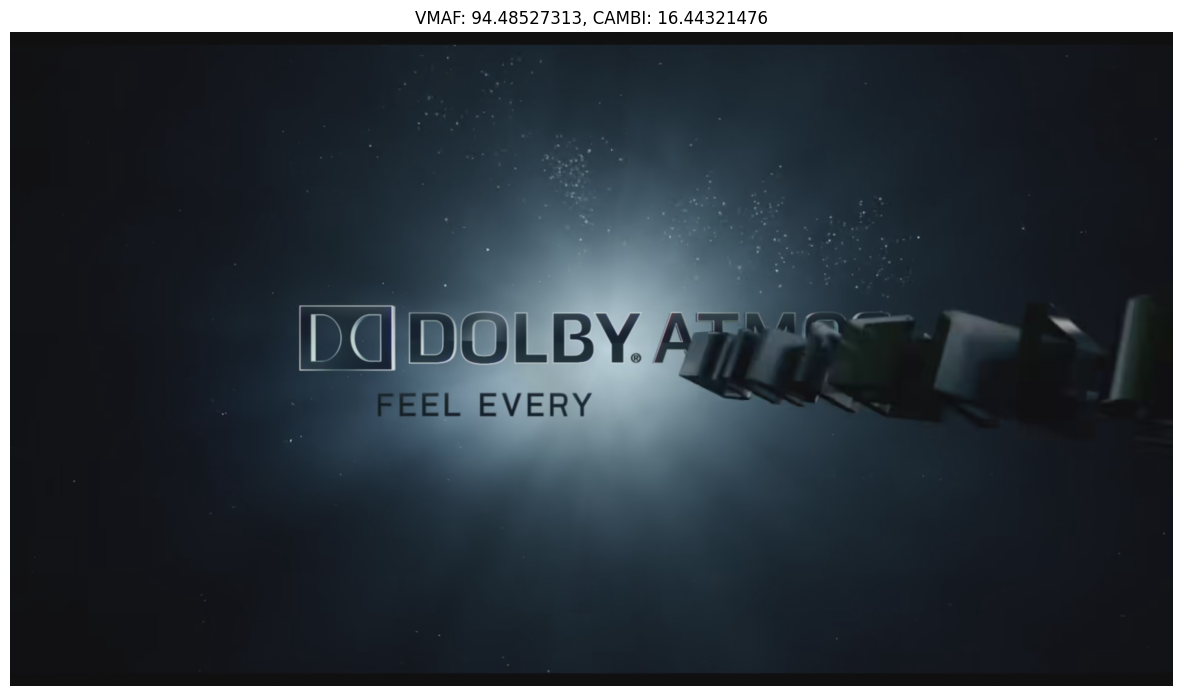

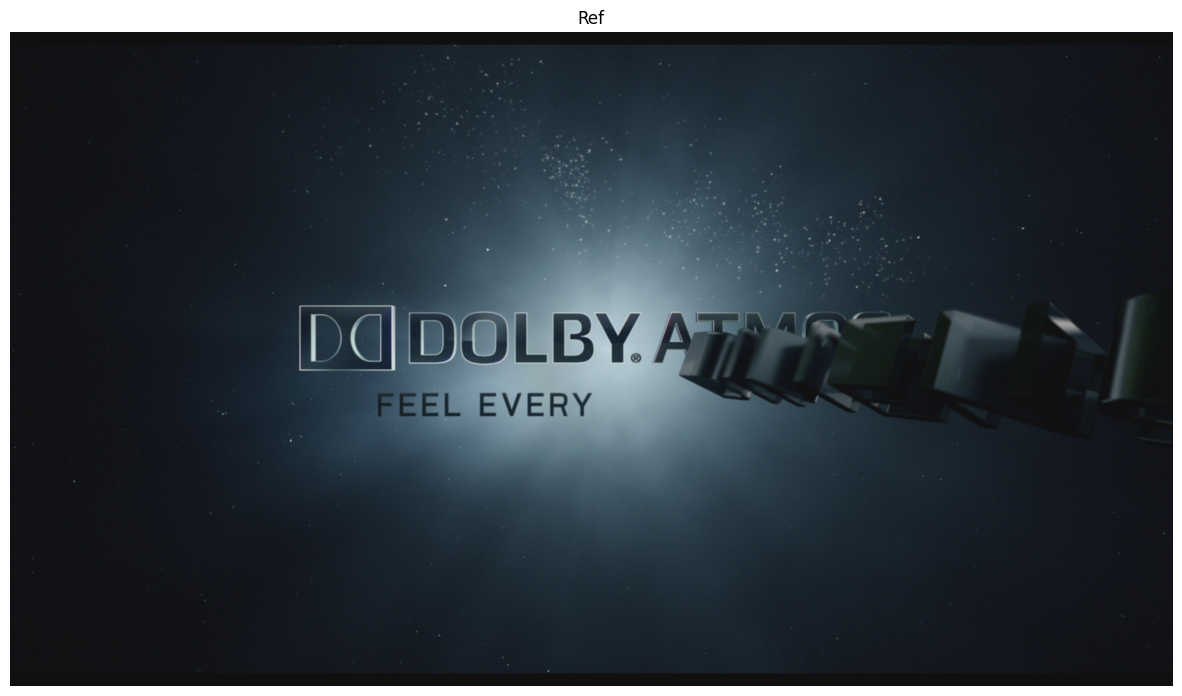

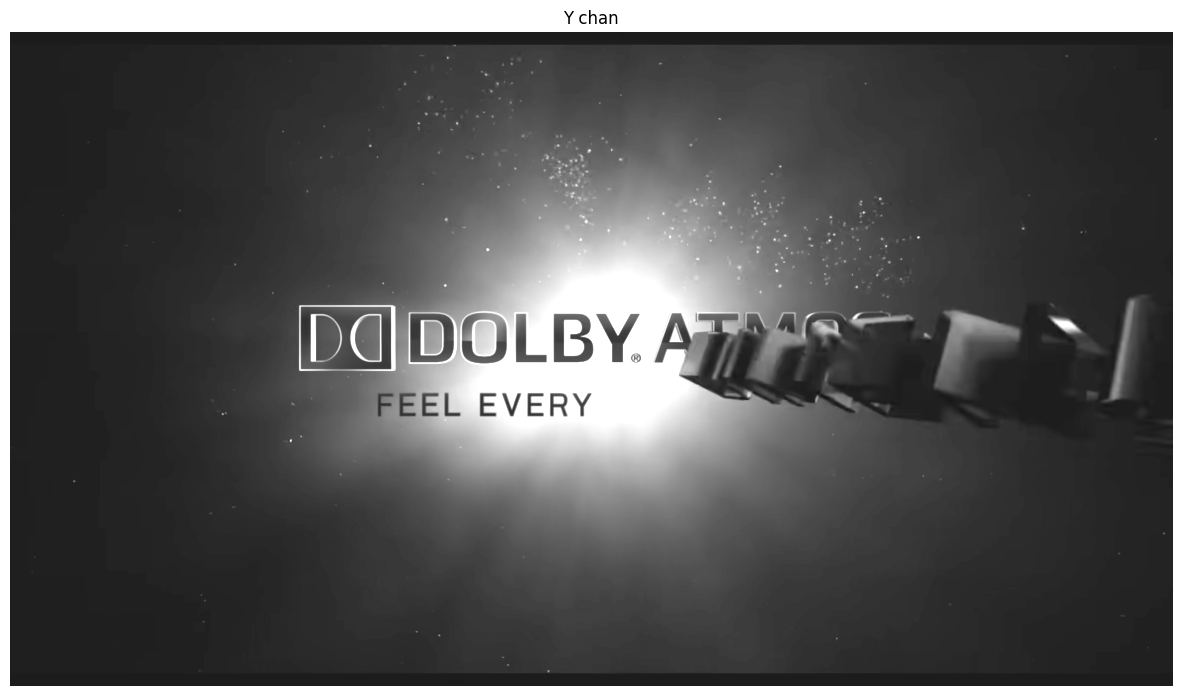

In [2]:
import pandas as pd 
from library import readYUV420, YUV2RGB, readYUV420Range
import matplotlib.pyplot as plt 
import os 
import numpy as np
import random
from scipy import ndimage

refPath = '/home/nwaliv/bandon/ramsookd/data/rawVideos'
compPath = '/home/nwaliv/bandon/nwaliv/trainVideoSetDeg'

vmaf_lim = 75
cambi_lim = 10
df = pd.read_csv('dataFrames/trainVideoSet.csv')
df = df[df['VMAF'] >= vmaf_lim]
df = df[df['CAMBI'] >= cambi_lim]
print(df.shape[0])

_row = df.sample(n=1,replace=False).to_dict(orient='records')[0]
print(_row['Comp'])

_frame = random.randint(0, _row['NumFrames']-1)
print("Frame ", _frame)
Ycomp,Ucomp,Vcomp = readYUV420Range(os.path.join(compPath, _row['Comp']), (_row['Width'], _row['Height']), (_frame, _frame), True)
YUV = np.stack([Ycomp,Ucomp,Vcomp], -1)
RGB = YUV2RGB(YUV)[0]/255

Y,U,V = readYUV420Range(os.path.join(refPath, _row['Ref']), (_row['Width'], _row['Height']), (_frame, _frame), True)
YUV = np.stack([Y,U,V], -1)
RGBRef = YUV2RGB(YUV)[0]/255

_diff = (Ycomp[0]/255)*1.75

plt.figure(figsize=(15,15), dpi=100)
plt.imshow(RGB)
plt.title(f"VMAF: {_row['VMAF']}, CAMBI: {_row['CAMBI']}")
plt.axis('off')
plt.show()


plt.figure(figsize=(15,15), dpi=100)
plt.imshow(RGBRef)
plt.title(f"Ref")
plt.axis('off')
plt.show()


plt.figure(figsize=(15,15), dpi=100)
plt.imshow(_diff, vmin=0, vmax=1, cmap='gray')
plt.title(f"Y chan")
plt.axis('off')
plt.show()

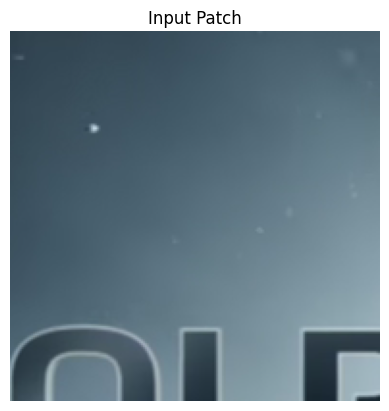

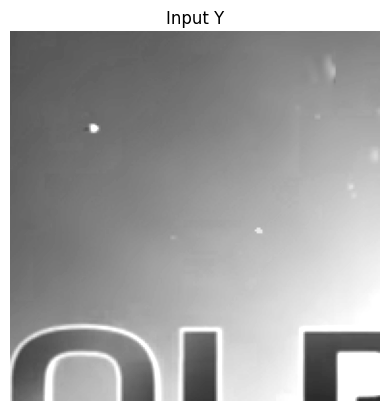

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


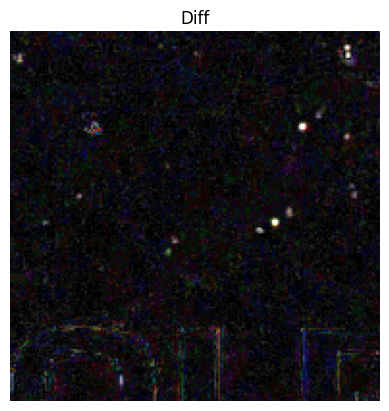

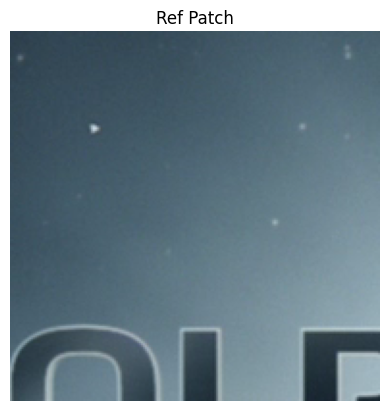

In [3]:
from library.GeneralOps import readYUV420RangePatches
# generate random patch location
patchSize = 192

randHeight = np.random.randint(0,_row['Height']-patchSize)
randWidth = np.random.randint(0,_row['Width'] -patchSize)
_xY, _xU, _xV = readYUV420RangePatches(os.path.join(compPath, _row['Comp']),(_row['Width'] ,_row['Height']),(_frame-1,_frame+1),(randWidth,randHeight),(patchSize,patchSize),True)
_xYUV = np.stack([_xY, _xU, _xV], -1)
_xRGB = YUV2RGB(_xYUV)/255.0

_yY, _yU, _yV = readYUV420RangePatches(os.path.join(refPath, _row['Ref']),(_row['Width'] ,_row['Height']),(_frame,_frame),(randWidth,randHeight),(patchSize,patchSize),True)
_yYUV = np.stack((_yY,_yU,_yV),axis=-1)
_yRGB = YUV2RGB(_yYUV)/255.0

_xRGB = np.concatenate((_xRGB[0], _xRGB[1], _xRGB[2]), axis=-1).reshape(1,patchSize,patchSize,9)
plt.imshow(_xRGB[0,:,:,3:6])
plt.title("Input Patch")
plt.axis('off')
plt.show()

plt.imshow(_xRGB[0,:,:,0]*1.75, vmin=0, vmax=1, cmap='gray')
plt.title("Input Y")
plt.axis('off')
plt.show()

plt.imshow(np.abs(_xRGB[0,:,:,3:6] - _yRGB[0])*10.0)
plt.title("Diff")
plt.axis('off')
plt.show()

plt.imshow(_yRGB[0])
plt.title("Ref Patch")
plt.axis('off')
plt.show()

1.0
[[0.]]


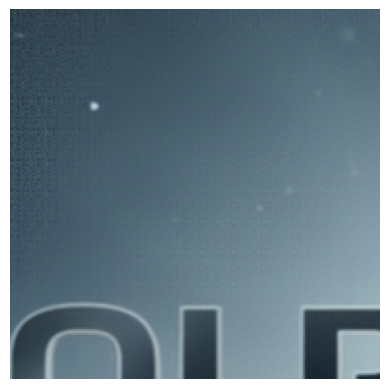

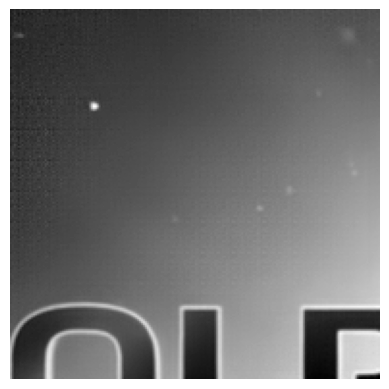

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


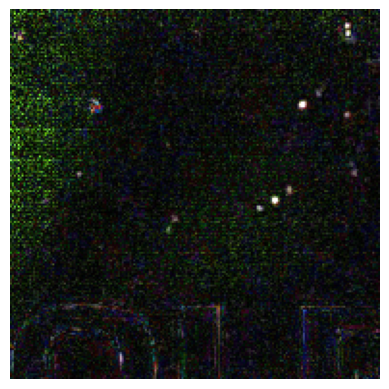

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000134        0.000014         0.000022
0.01
[[0.]]


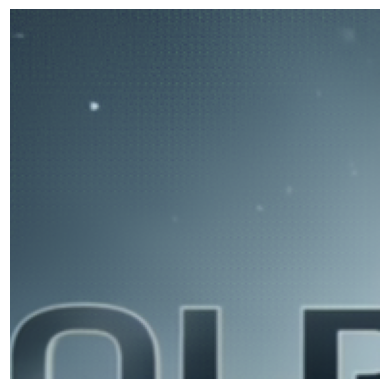

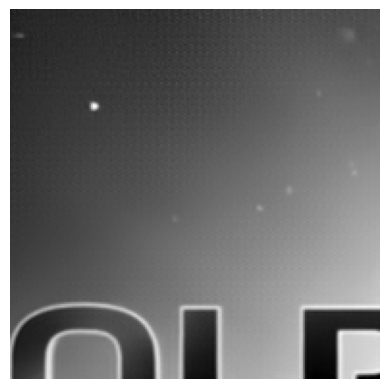

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


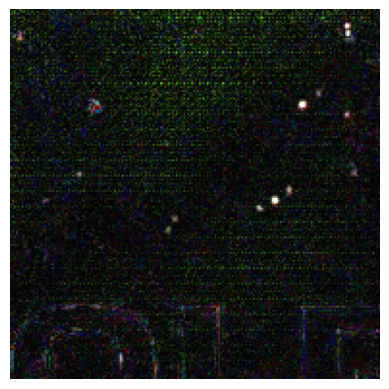

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000113        0.001307         0.000056
0.001
[[0.]]


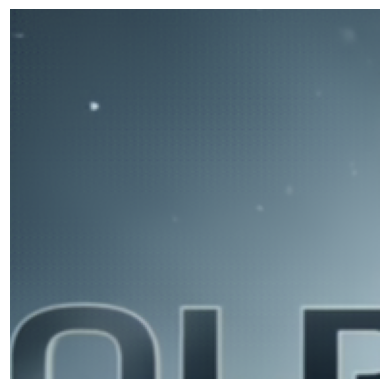

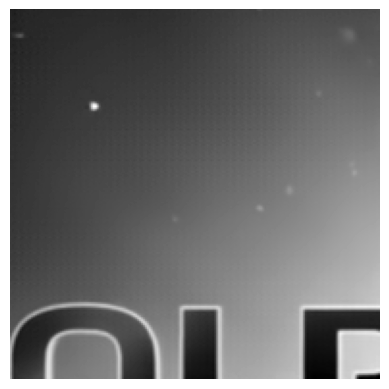

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


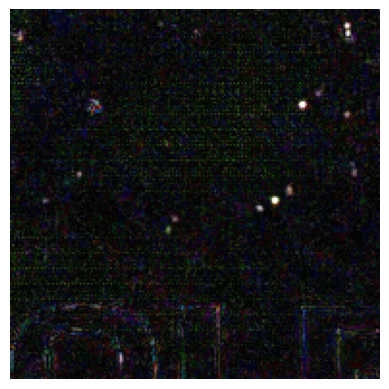

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000091        0.010126         0.000455
0.0001
[[0.]]


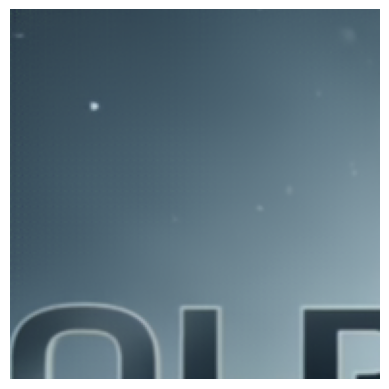

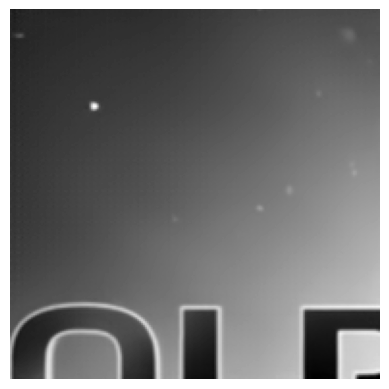

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


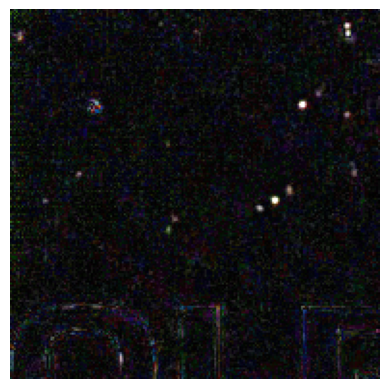

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000078        0.062168         0.008317
1e-05
[[0.024758]]


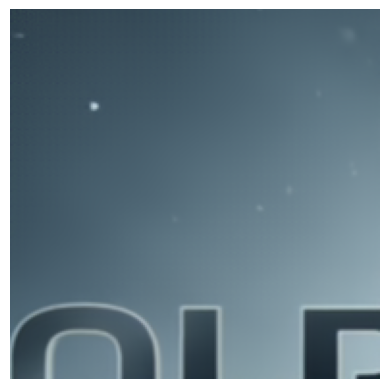

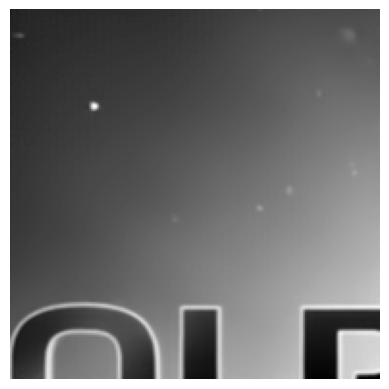

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


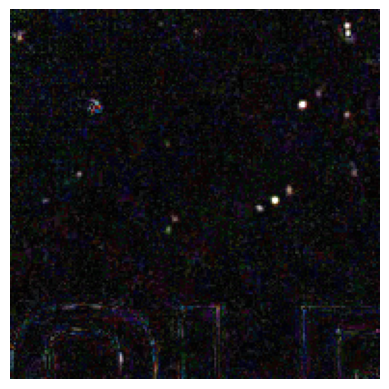

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000073        0.705944         0.136226
5e-06
[[0.000273]]


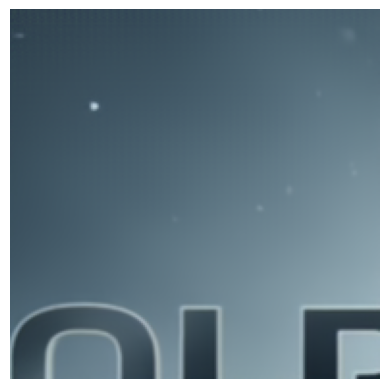

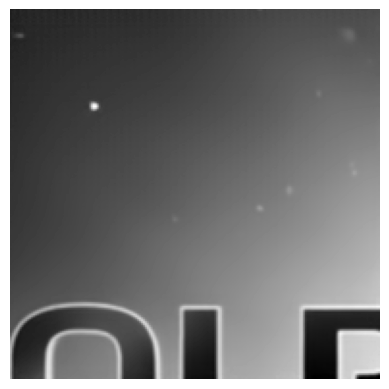

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


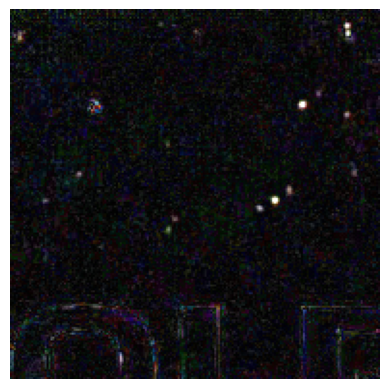

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1       0.00007        3.169595         1.849608
2.5e-06
[[0.687295]]


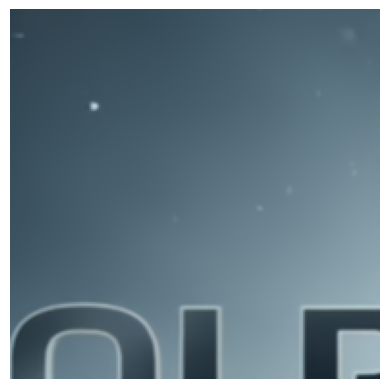

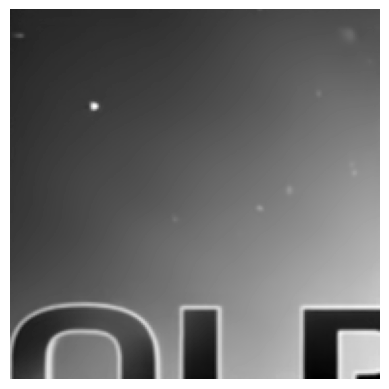

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


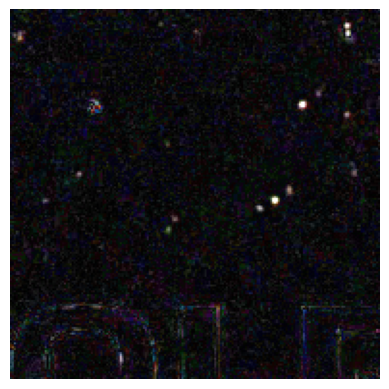

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1       0.00007        6.828487         3.470879
1.5e-06
[[0.812918]]


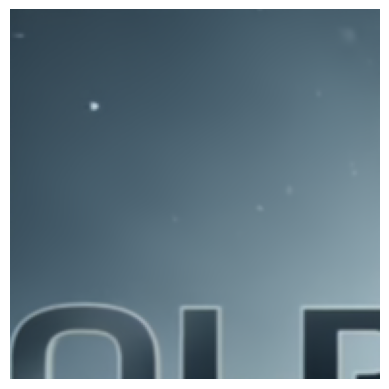

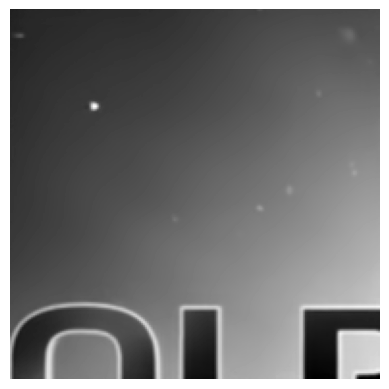

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


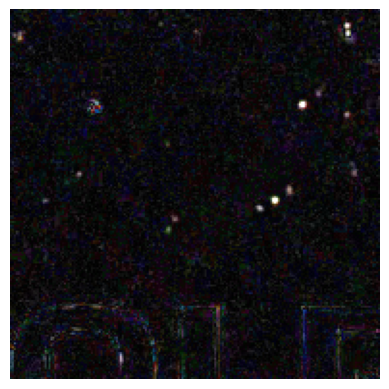

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000069        7.837415         4.121685
1e-06
[[0.806207]]


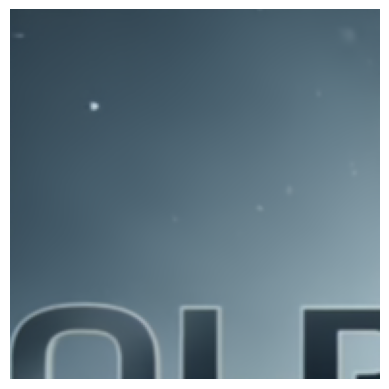

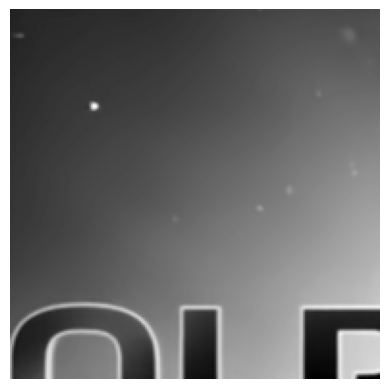

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


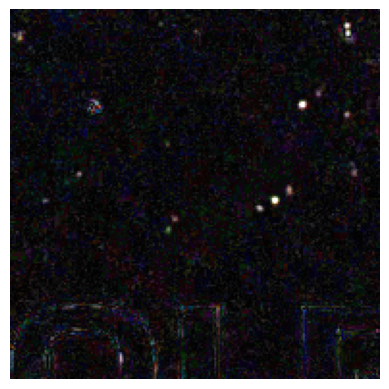

   MSE_GEN_Loss  Cambi_GEN_Loss  MSE_CRITIC_Loss
1      0.000069        8.654801         4.815008


In [4]:
from src import hrNet
from library.GeneralOps import upSample2XTile
from library import returnMetric
alphas = [1.0, 0.01, 0.001, 0.0001, 1e-05, 5e-06, 2.5e-06, 1.5e-06 ,1e-06]
generator = hrNet(2, [32, 64, 128, 256], 5).model()
for _alpha in alphas:
    df = pd.read_json(f"results/HRNET_CAMBI_ALPHA{_alpha}.json")
    generator.load_weights(f'results/HRNET_CAMBI_ALPHA{_alpha}.h5')
    _output = generator(_xRGB, training=False)
    _outputUs = upSample2XTile(_output)
    patch_tSmallUS = upSample2XTile(_yRGB/255.0)
    print(_alpha)
    print(returnMetric(_outputUs, patch_tSmallUS, height=192*2, width=192*2))
    plt.imshow(np.clip(_output[0],0,1))
    plt.axis('off')
    plt.show()
    plt.imshow(np.clip(_output[0,:,:,0],0,1),cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imshow(np.abs(_output[0] - (_yRGB[0]))*10.0)
    plt.axis('off')
    plt.show()
    print(df.loc[[1]])

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


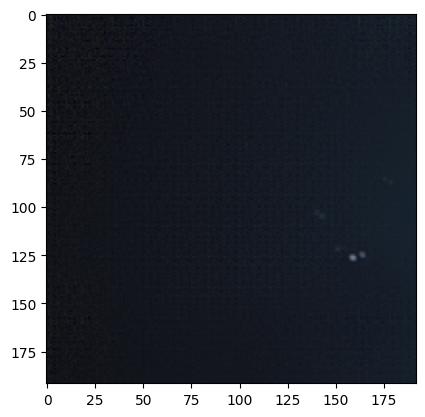

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


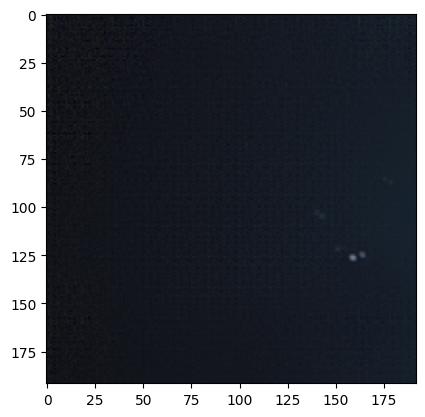

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


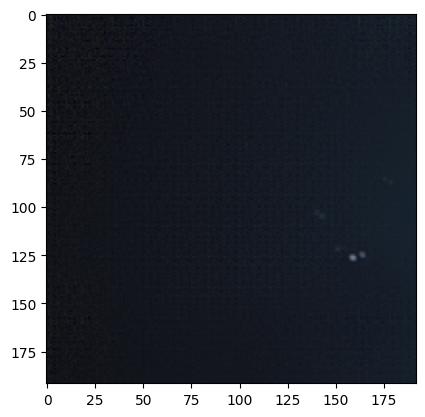

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


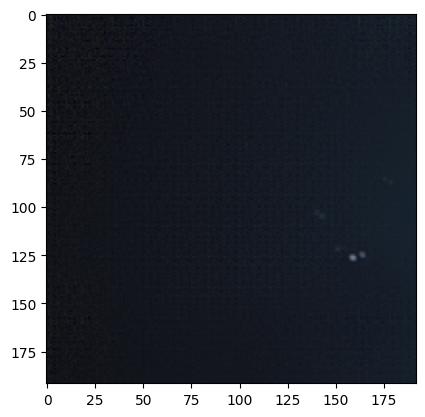

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


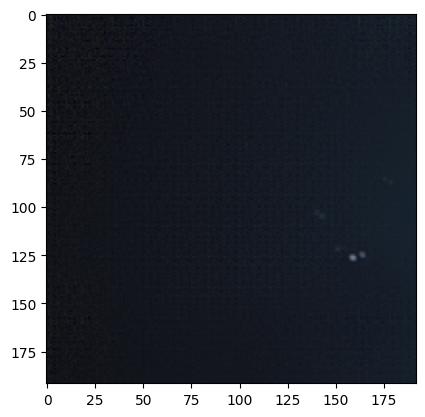

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


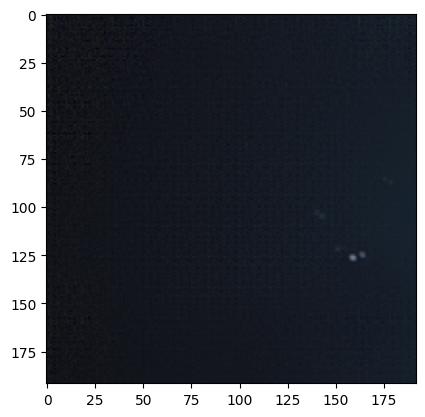

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


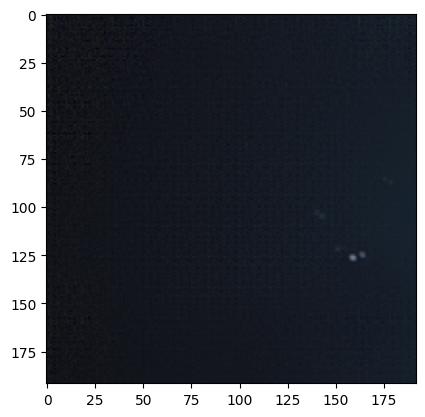

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


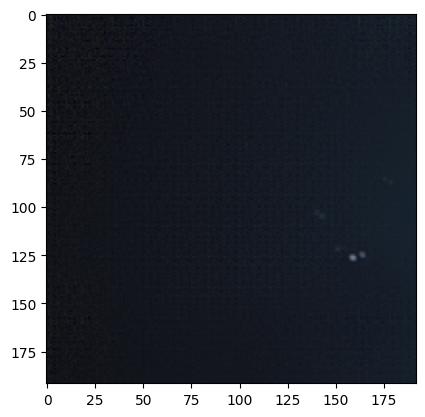

(1, 273, 192, 192, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


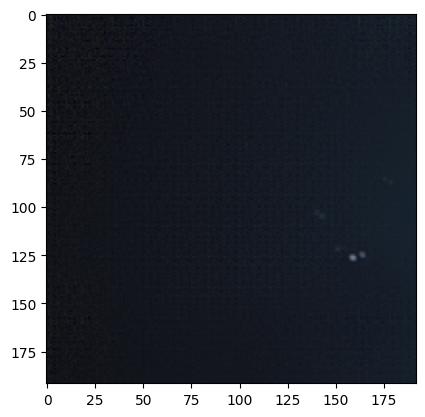

In [6]:
from src import hrNet
from library.GeneralOps import upSample2XTile
from library import returnMetric
from src.auxFunctions import readFrames, deconstruct, reconstruct
import tensorflow as tf
alphas = [1.0, 0.01, 0.001, 0.0001, 1e-05, 5e-06, 2.5e-06, 1.5e-06 ,1e-06]
generator = hrNet(2, [32, 64, 128, 256], 5).model()
for _alpha in alphas:
    #_alpha = 1.0
    df = pd.read_json(f"results/HRNET_CAMBI_ALPHA{_alpha}.json")


    frame_tmin1,frame_t,frame_tplus1 = readFrames(os.path.join(compPath, _row['Comp']),(_row['Width'], _row['Height']),_frame,_row['NumFrames'])

    window_tmin1 = deconstruct(frame_tmin1,192)
    window_t = deconstruct(frame_t,192)
    window_tplus1 = deconstruct(frame_tplus1,192)

    inputPatches = np.concatenate((window_tmin1, window_t, window_tplus1), axis=-1)
    inputPatches = np.expand_dims(inputPatches, axis=0)/255.0
    print(inputPatches.shape)
    numPatches = inputPatches.shape[1]
    # inputPatches = tf.convert_to_tensor(inputPatches)

    outputPatches = np.empty((1,numPatches,192,192,3))
    for patch in range(1):
        #generator.load_weights(f'results/HRNET_CAMBI_ALPHA{_alpha}.h5')
        generator.load_weights('results/HRNET_CAMBI_ALPHA1.0.h5')
        # outputPatches[:,patch,:,:,:] = generator(inputPatches[:,215,:,:,:],training=False)
        #inputPatch = inputPatches[:,150,:,:,:]
        inputPatch = np.copy(inputPatches[:,150,:,:,:])
        inputPatch = tf.convert_to_tensor(inputPatch)
        
        testPatch = generator(inputPatch,training=False)
        plt.imshow(testPatch[0])
        #plt.imshow(outputPatches[0,patch,:,:,:]/255.0)
        plt.show()
        #print("Patch ", patch," done out of ", numPatches)

    # outputFrame = reconstruct(outputPatches[0],frame_t,192)
    # print("alpha = ", _alpha)
    # plt.figure(figsize=(15,15), dpi=100)
    # plt.imshow(outputFrame/255.0)

    # print(df.loc[[1]])

In [ ]:
plt.figure(figsize=(15,15), dpi=100)
plt.imshow(RGB)
plt.title(f"VMAF: {_row['VMAF']}, CAMBI: {_row['CAMBI']}")
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(15,15), dpi=100)
plt.imshow(np.abs(RGB - outputFrame/255.0)*10)
plt.axis('off')
plt.show()

In [ ]:
from src import hrNet
from library.GeneralOps import upSample2XTile
from library import returnMetric
from src.auxFunctions import readFrames, deconstruct, reconstruct
import tensorflow as tf
generator = hrNet(2, [32, 64, 128, 256], 5).model()

outputPatches = np.empty((1,numPatches,192,192,3))
patch = 0
for _width in range (_row['Width']-192):
    for _height in range (_row['Height']-192):
        _xY, _xU, _xV = readYUV420RangePatches(os.path.join(compPath, _row['Comp']),(_row['Width'] ,_row['Height']),(_frame-1,_frame+1),(_width,_height),(patchSize,patchSize),True)
        _xYUV = np.stack([_xY, _xU, _xV], -1)
        _xRGB = YUV2RGB(_xYUV)/255.0
        _xRGB = np.concatenate((_xRGB[0], _xRGB[1], _xRGB[2]), axis=-1).reshape(1,patchSize,patchSize,9)
        generator.load_weights('results/HRNET_CAMBI_ALPHA1.0.h5')
        _output = generator(_xRGB, training=False)
        plt.imshow(_output[0])
        